In [2]:
library(dplyr)
library(ggplot2)
library(tidyr)

Warning message:
“replacing previous import by ‘rlang:::=’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::.data’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::as_label’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::as_name’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::dots_n’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::enquo’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::enquos’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::expr’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::sym’ when loading ‘dplyr’”Warning message:
“replacing previous import by ‘rlang::syms’ when loading ‘dplyr’”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect

# Read the tsv file and assign it to a variable

In [3]:
twitterdata <- read.table("sample_twitter_personal_data.tsv",header = TRUE)

In [8]:
head(twitterdata)

twitter_id,age,dob_day,dob_year,dob_month,gender,followers_count,initiated_to_follow,heart,heart_received,mobile_app_heart,mobile_app_heart_received,web_heart,web_heart_received
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
2094382,14,19,1999,11,male,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,0,0,0,0,0,0,0,0
1524765,14,1,1999,12,male,0,0,0,0,0,0,0,0


# Q1. List all the headers in the dataset.

In [14]:
headers <- matrix(colnames(twitterdata))
headers

twitter_id
age
dob_day
dob_year
dob_month
gender
followers_count
initiated_to_follow
heart
heart_received
mobile_app_heart


# Q2. Order (ascending) the headers and assign numbers for the ordered headers.

In [23]:
ordered_headers <- matrix(sort(headers , decreasing=FALSE))
index <- seq(1,length(ordered_headers))
data.frame( index , ordered_headers )

index,ordered_headers
<int>,<fct>
1,age
2,dob_day
3,dob_month
4,dob_year
5,followers_count
6,gender
7,heart
8,heart_received
9,initiated_to_follow


# Q3. List all Twitter users whose "followers_count" is greater (>) than 100.

In [28]:
twitterdata_great_1000 <- twitterdata %>%
    filter( followers_count > 1000 )
head(twitterdata_great_1000)

twitter_id,age,dob_day,dob_year,dob_month,gender,followers_count,initiated_to_follow,heart,heart_received,mobile_app_heart,mobile_app_heart_received,web_heart,web_heart_received
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1154612,14,20,1999,11,female,1094,720,0,0,0,0,0,0
1584664,14,30,1999,5,male,1108,752,0,2,0,2,0,0
1302793,14,1,1999,10,male,1073,599,0,0,0,0,0,0
1395711,16,4,1997,12,male,1185,886,0,18,0,11,0,7
1926785,15,31,1998,5,female,1174,1061,0,8,0,6,0,2
1346281,15,6,1998,10,male,1001,745,0,2,0,1,0,1


# Q4. List all the twitter MALE users whose "followers_count" is greater (>) than 100.

In [29]:
twitterdata_male_100 <- twitterdata %>%
    filter( followers_count > 100 ) %>%
    filter(gender == "male")

head(twitterdata_male_100)

twitter_id,age,dob_day,dob_year,dob_month,gender,followers_count,initiated_to_follow,heart,heart_received,mobile_app_heart,mobile_app_heart_received,web_heart,web_heart_received
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1986751,14,23,1999,11,male,104,59,0,0,0,0,0,0
1309735,15,5,1998,11,male,104,44,0,0,0,0,0,0
1729330,15,17,1998,12,male,102,99,0,0,0,0,0,0
1364132,14,18,1999,1,male,104,43,0,4,0,4,0,0
1467199,14,9,1999,2,male,101,60,0,0,0,0,0,0
1013081,15,14,1998,4,male,103,87,0,1,0,1,0,0


# Q5. It is a saying,
“​ Males always initiate to follow another Twitter account (female/male account) FIRST than
Female ​ ”
To prove the above statement, analyze the data and provide some evidence.

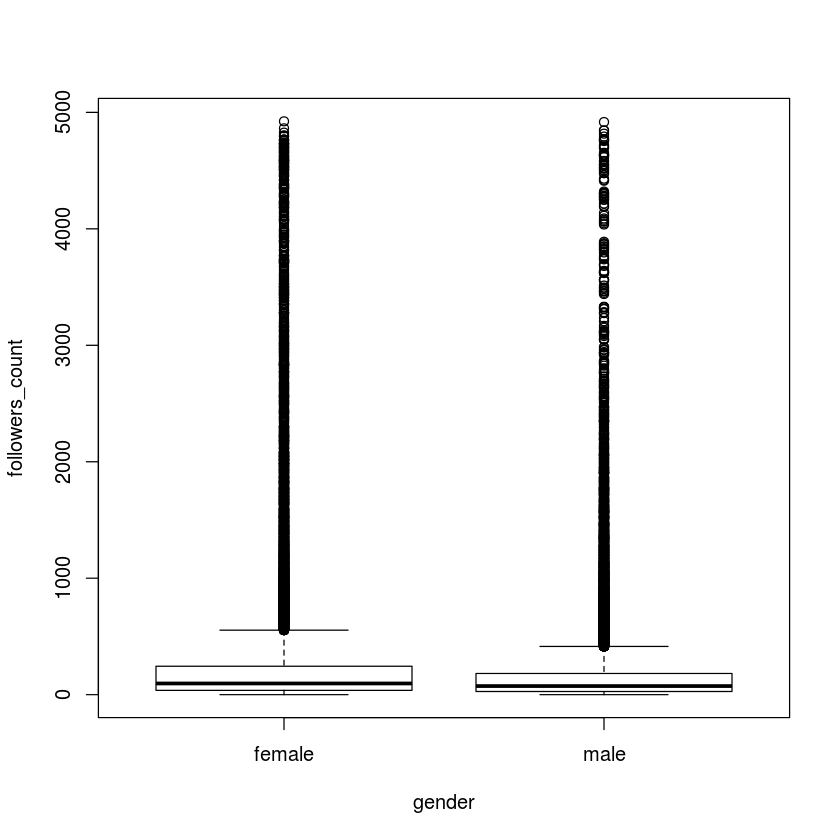

In [17]:
boxplot(twitterdata$followers_count ~ twitterdata$gender, data = mtcars, xlab = "gender",ylab = "followers_count")

According to the above boxplot we can see there are lot of outliers involve. Let's do a two sample t-test using two groups of data

In [19]:
male_numbers <- twitterdata %>%
    drop_na(gender)%>%
    filter( gender == "male" ) 
female_numbers <- twitterdata %>%
    drop_na(gender)%>%
    filter( gender == "female" ) 
t.test(male_numbers$followers_count,female_numbers$followers_count,paired=FALSE , alternative="greater")


	Welch Two Sample t-test

data:  male_numbers$followers_count and female_numbers$followers_count
t = -28.565, df = 63218, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -81.36469       Inf
sample estimates:
mean of x mean of y 
 165.0355  241.9699 


Our null hypothesis : mean (male) <= mean(female)
    alternative hypothesis : mean (male) > mean(female)
    
according to the t-test result t-score = -28.565

t-score lies within the confidence interval. So null hypothesis is rejected. So according to the alternative hypothesis above statement is false.

# Q6.Your manager has requested study the data and asked you to provide a graphical representation for the following use cases,

1.HISTOGRAMS for day column in DOB (eg: dob_day)

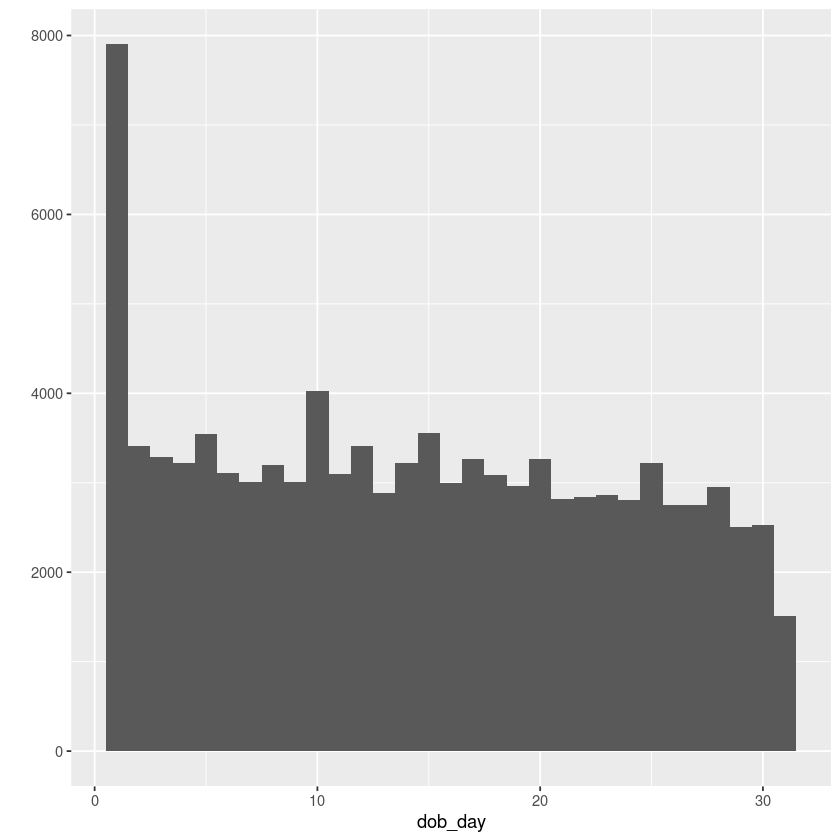

In [59]:
dob_day <- twitterdata$dob_day
qplot(dob_day, geom="histogram" , bins=31 , width= 1 ) 

2.FREQUENCY PLOT for the followers count

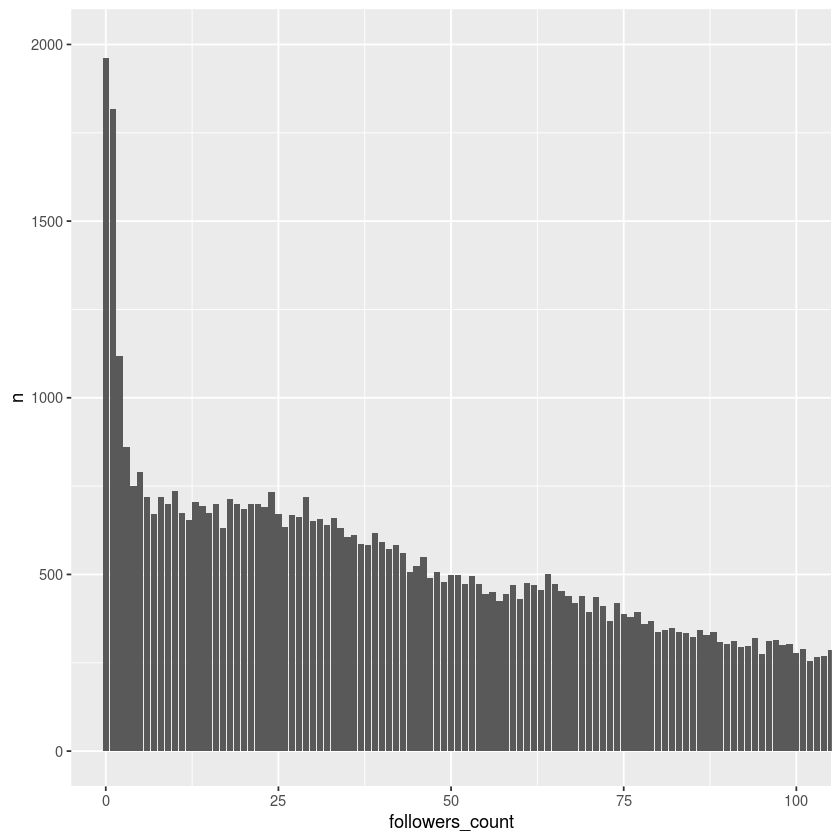

In [98]:
by_followers_count <- twitterdata %>%
    count(followers_count)

ggplot(by_followers_count, aes(x=followers_count,y=n  ))+
geom_col()+
coord_cartesian(xlim = c(0, 100), ylim = c(0, 2000))
#expand_limits(y=c(0,2000) , x = c(0,2000))

3.FREQUENCY PLOT for the age of the users over the years in the sample dataset

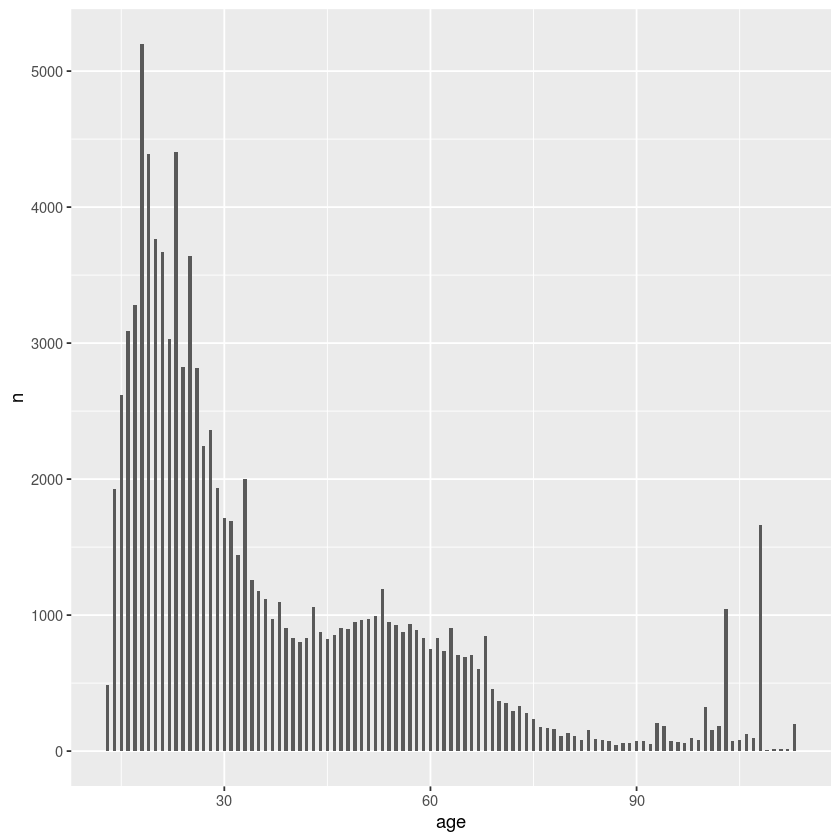

In [81]:
by_age <- twitterdata %>%
    count(age)

ggplot(by_age, aes(x=age,y=n, width= 0.5  ))+
geom_col()+
expand_limits(y=0)

4.Plot BAR CHART to indicate and show the total hearts given by male, female users

In [49]:
by_gender <- twitterdata %>%
    drop_na(gender)%>%
    group_by( gender ) %>%
    summarize(heart_count=sum(heart))

by_gender

gender,heart_count
<fct>,<int>
female,10468106
male,4959923


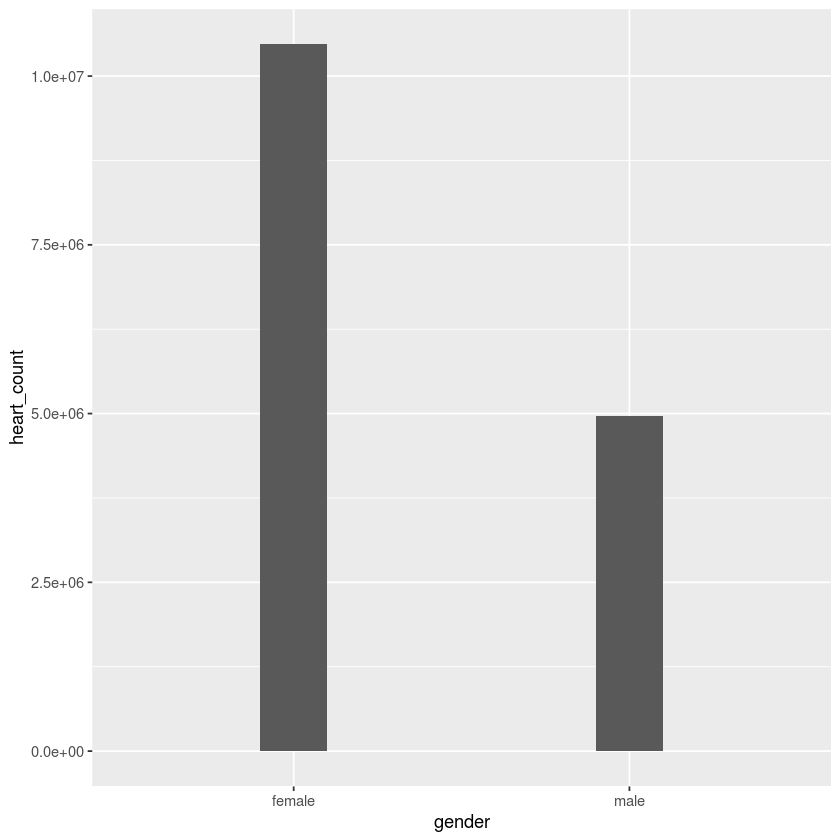

In [58]:
ggplot(by_gender, aes(x=gender,y=heart_count , width= 0.2 , height=0.1 ))+
geom_col()+
expand_limits(y=0)

5.Analyze and visualize in CHART to confirm that people use a mobile/web interface to
experience twitter

In [39]:
heart_mobile <- twitterdata %>%
 summarize( heart_mobile = sum(mobile_app_heart))

heart_mobile

heart_mobile
<int>
10505832


In [40]:
heart_web <- twitterdata %>%
 summarize( heart_web = sum(web_heart))

heart_web

heart_web
<int>
4946430


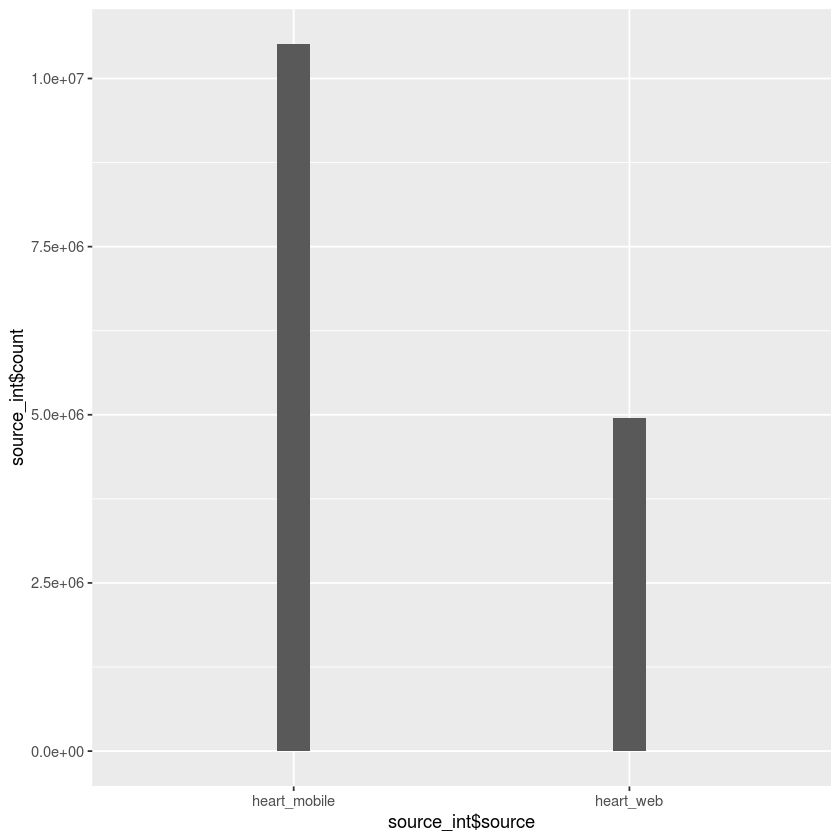

In [55]:
source_int <- data.frame( c("heart_web" ,"heart_mobile" ) , c(heart_web[1,1] , heart_mobile[1,1]) )
colnames(source_int) <- c("source" , "count")

ggplot(source_int, aes(x=source_int$source,y=source_int$count , width=0.1  ))+
geom_col()+
expand_limits(y=0)



# Q7. Based on your critical analysis write down in points your thoughts and suggestions to improve the twitter features.

In [36]:
head(twitterdata %>%count(heart))

heart,n
<int>,<int>
0,22308
1,6928
2,4434
3,3240
4,2507
5,2027


According to the above summarization there are 22308 twitter ids with 0 heart reaction. So increacing the numbers of reaction type may increace the interaction

According to the bar chart in Q6. 4. we can see that men interaction is less that female. So add features whose can attract men.

In [37]:
head(twitterdata %>%count(age))

age,n
<int>,<int>
13,484
14,1925
15,2618
16,3086
17,3283
18,5196


According to above summarization there are no user with age grater than 18. Introduce feature such that people with age grater than 18 attract to twitter

When we go through the dataframe we can't see location information. if there are location information, can suggest news based on locations.